In [1]:
import numpy as np #array
import pandas as pd #df
import matplotlib.pyplot as plt #plot
import seaborn as sns #to check non linear relation
import sklearn.linear_model as lm #y=mx+c
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf # all attributes
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import KFold , cross_val_score 
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA

C:\Users\wangd\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
all=pd.read_csv('all.csv',index_col=0)

In [3]:
all

,SM,Temp,AirQuality,TDS,Height,Location
0,201,33.0,210,54,135,Parle
1,198,32.8,208,54,135,Parle
2,196,32.6,205,54,135,Parle
3,192,32.2,202,54,135,Parle
4,195,32.5,205,54,135,Parle
...,...,...,...,...,...,...
295,203,33.3,233,46,94,Nahur
296,177,30.7,207,46,94,Nahur
297,187,31.7,217,46,94,Nahur
298,179,30.9,209,46,94,Nahur


In [4]:
all[["SM",'Temp','AirQuality']]=scale(all[["SM",'Temp','AirQuality']],with_mean=True,with_std=True)
all

,SM,Temp,AirQuality,TDS,Height,Location
0,0.254304,0.133888,0.397659,54,135,Parle
1,0.139695,0.029560,0.213557,54,135,Parle
2,0.063289,-0.074769,-0.062594,54,135,Parle
3,-0.089522,-0.283425,-0.338746,54,135,Parle
4,0.025087,-0.126933,-0.062594,54,135,Parle
...,...,...,...,...,...,...
295,0.330709,0.290380,2.514822,46,94,Nahur
296,-0.662565,-1.065887,0.121507,46,94,Nahur
297,-0.280536,-0.544246,1.042013,46,94,Nahur
298,-0.586159,-0.961559,0.305608,46,94,Nahur


In [5]:
manova=MANOVA.from_formula('SM+Temp+AirQuality+TDS+Height~Location',all)
print(manova.mv_test())
#Everything is unique

                                Multivariate linear model
                                                                                         
-----------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF         F Value        Pr > F
-----------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 5.0000 290.0000 9498501032272260.0000 0.0000
         Pillai's trace               1.0000 5.0000 290.0000 9498501032272260.0000 0.0000
 Hotelling-Lawley trace 163767259177107.9375 5.0000 290.0000 9498501032272260.0000 0.0000
    Roy's greatest root 163767259177107.9375 5.0000 290.0000 9498501032272260.0000 0.0000
-----------------------------------------------------------------------------------------
                                                                                         
------------------------------------------

In [6]:
fit1=ols('SM~Location',all).fit()
anova1=sm.stats.anova_lm(fit1)
anova1
#greatest F value

,df,sum_sq,mean_sq,F,PR(>F)
Location,5.0,271.524469,54.304894,560.679219,5.481296e-148
Residual,294.0,28.475531,0.096856,NaN,NaN


In [7]:
fit2=ols('Temp~Location',data=all).fit()
anova2=sm.stats.anova_lm(fit2)
anova2

,df,sum_sq,mean_sq,F,PR(>F)
Location,5.0,251.535962,50.307192,305.181229,4.352875e-114
Residual,294.0,48.464038,0.164844,NaN,NaN


In [8]:
fit3=ols('AirQuality~Location',data=all).fit()
anova3=sm.stats.anova_lm(fit3)
anova3

,df,sum_sq,mean_sq,F,PR(>F)
Location,5.0,150.036944,30.007389,58.828971,2.622568e-42
Residual,294.0,149.963056,0.510078,NaN,NaN


In [9]:
fit4=ols('TDS~Location',data=all).fit()
anova4=sm.stats.anova_lm(fit4)
anova4

,df,sum_sq,mean_sq,F,PR(>F)
Location,5.0,3.441667e+03,6.883333e+02,3.440644e+29,0.0
Residual,294.0,5.881747e-25,2.000594e-27,NaN,NaN


In [10]:
fit5=ols('Height~Location',data=all).fit()
anova5=sm.stats.anova_lm(fit5)
anova5

,df,sum_sq,mean_sq,F,PR(>F)
Location,5.0,132120.0,26424.00000,60.394428,3.829005e-43
Residual,294.0,128632.0,437.52381,NaN,NaN


In [11]:
tukey1=pairwise_tukeyhsd(all["SM"],groups=all["Location"])
tukey1._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
Andheri,Bhandup,-1.4082,-0.0,-1.5867,-1.2296,True
Andheri,Goregaon,-1.6053,-0.0,-1.7838,-1.4267,True
Andheri,Mulund,1.0559,-0.0,0.8774,1.2345,True
Andheri,Nahur,-1.4227,-0.0,-1.6012,-1.2441,True
Andheri,Parle,-0.5341,-0.0,-0.7126,-0.3555,True
Bhandup,Goregaon,-0.1971,0.0209,-0.3757,-0.0186,True
Bhandup,Mulund,2.4641,-0.0,2.2855,2.6426,True
Bhandup,Nahur,-0.0145,0.9999,-0.1931,0.164,False
Bhandup,Parle,0.8741,-0.0,0.6955,1.0526,True
Goregaon,Mulund,2.6612,-0.0,2.4827,2.8398,True


In [12]:
#Nahur and Bhandup is same
Andheri=all.iloc[50:99,0]
Goregaon=all.iloc[100:149,0]
VileParle=all.iloc[0:49,0]
Bhandup=all.iloc[150:199,0]
Mulund=all.iloc[200:249,0]

In [13]:
stats.ttest_ind(Andheri,Mulund,alternative="less",equal_var=False) #reject Andheri>Mulund therefore Mulund>Andheri

Ttest_indResult(statistic=-33.07798227358386, pvalue=4.4809703378458055e-35)

In [14]:
stats.ttest_ind(Andheri,Goregaon,alternative="less",equal_var=False) #accept Andheri>Goregaon

Ttest_indResult(statistic=17.044167658115153, pvalue=1.0)

In [15]:
stats.ttest_ind(VileParle,Goregaon,alternative="less",equal_var=False) #accept Goregaon>VileParle

Ttest_indResult(statistic=11.949213988107182, pvalue=0.9999999999999998)

In [16]:
stats.ttest_ind(VileParle,Bhandup,alternative="less",equal_var=False) #accept Vileparle>Bhandup

Ttest_indResult(statistic=28.10998739094562, pvalue=1.0)

In [17]:
stats.ttest_ind(Bhandup,Goregaon,alternative="less",equal_var=False) #accept Bhandup>Goregaon

Ttest_indResult(statistic=2.379427679400056, pvalue=0.9896448258788451)

In [18]:
stats.ttest_ind(VileParle,Andheri,alternative="less",equal_var=False) #reject Vileparle<Andheri

Ttest_indResult(statistic=-15.572029836460814, pvalue=9.318687655149602e-24)

In [19]:
#Mulund>Andheri>Bhandup>Goregaon>Vileparle

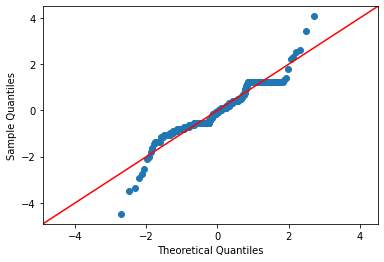

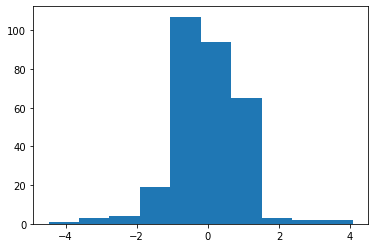

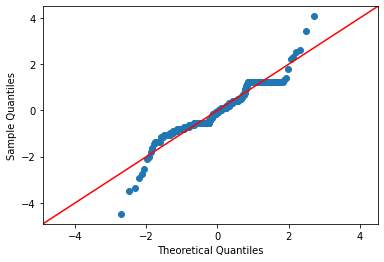

In [20]:
plt.hist(all.AirQuality)
sm.qqplot(all.AirQuality,line='45')

<AxesSubplot:xlabel='Temp', ylabel='Height'>

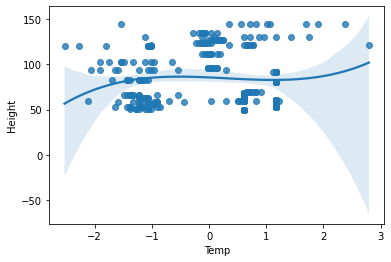

In [21]:
sns.regplot(x=all['Temp'],y=all['Height'],order=3)

In [22]:
y=all.Height
x=all.iloc[:,:-2]
model=lm.LinearRegression().fit(x,y)
print(model.coef_)
print(model.intercept_)
x.shape

[ -2.95222531 -12.15725749  10.90213786   6.57332572]
-237.3974059723067


(300, 4)

In [23]:
regi=Ridge(alpha=800) #alpha is lambda
regi.fit(x,y)
regi.coef_

array([-1.44438805, -1.24733079,  1.01344649,  4.37298651])

In [24]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM          300 non-null    float64
 1   Temp        300 non-null    float64
 2   AirQuality  300 non-null    float64
 3   TDS         300 non-null    int64  
 4   Height      300 non-null    int64  
 5   Location    300 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 16.4+ KB


In [25]:
kfold=KFold(n_splits=10,random_state=1,shuffle=True)
test=cross_val_score(model,x,y,cv=kfold,scoring="neg_mean_squared_error",n_jobs=-1) #repeats for every one
print(-np.mean(test))

446.56932596905807


In [26]:
all2=all.iloc[:,:-1]
all2
all2=all2.drop(["TDS"],axis=1) #because factor variable

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression


x=add_constant(all2)
vif_df=pd.DataFrame()
vif_df["feature"]=x.columns

vif_df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

print(vif_df)

      feature        VIF
0       const  11.012385
1          SM   2.360518
2        Temp   1.894097
3  AirQuality   1.829614
4      Height   1.245178


In [28]:
dum = pd.get_dummies(all, columns = ['Location','TDS'])
#print(dum)
dum.columns

Index(['SM', 'Temp', 'AirQuality', 'Height', 'Location_Andheri',
       'Location_Bhandup', 'Location_Goregaon', 'Location_Mulund',
       'Location_Nahur', 'Location_Parle', 'TDS_45', 'TDS_46', 'TDS_50',
       'TDS_52', 'TDS_54'],
      dtype='object')

In [29]:
f2=smf.ols("Height~TDS_45+Location_Andheri+Location_Mulund+TDS_50+AirQuality+Temp+Location_Parle+Location_Mulund*TDS_45+SM",dum).fit()
f2.summary()
#+Location_Vile Parle
#TDS_44 ka .1 tha
#+AirQuality .24

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     48.60
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           3.10e-41
Time:                        20:20:57   Log-Likelihood:                -1337.2
No. Observations:                 300   AIC:                             2688.
Df Residuals:                     293   BIC:                             2714.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.2580      6.313     10.970      0.000      56.833      81.683
TDS_45                     7.7686      5.160      1.505      0.133      -2.387      17.925
Location_Andheri           5.8025      7.948      0.730      0.466      -9.840      21.445
Location_Mulund            7.7686      5.160      1.505      0.133      -2.387      17.925
TDS_50                     5.8025      7.948      0.730      0.466      -9.840      21.445
AirQuality                 8.6726      4.159      2.085      0.038       0.488      16.857
Temp                       8.5731      3.346      2.562      0.011       1.987      15.159
Location_Parle            51.1410      7.248      7.056      0.000      36.876      65.406
Location_Mulund:TDS_45     7.7686      5.160      1.505      0.133      -2.387      17.925
SM                       -27.7200      6.967     -3.979      0.000     -41.432     -14.008
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.109
Skew:                           0.284   Prob(JB):                        0.128
Kurtosis:                       2.920   Cond. No.                     7.42e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
f3=smf.ols("Height~TDS_45+Location_Andheri+Location_Mulund+TDS_50+AirQuality+Temp+Location_Parle+Location_Mulund*TDS_45+Location_Andheri*TDS_50+AirQuality*TDS_50+Location_Nahur",dum).fit()
f3.summary()
p = f3.predict(dum)
error = (dum.Height-p)**2
print(np.mean(error))

422.2507615318515


In [31]:
f5=smf.ols("Height~Location_Mulund+Temp+Location_Parle+AirQuality*TDS_50+Location_Bhandup+I(Temp**2)",dum).fit()
f5.summary() #best model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     43.94
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           7.93e-46
Time:                        20:20:57   Log-Likelihood:                -1322.0
No. Observations:                 300   AIC:                             2662.
Df Residuals:                     291   BIC:                             2695.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            89.5736      2.878     31.119      0.000      83.908      95.239
Location_Mulund     -31.7266      4.111     -7.718      0.000     -39.817     -23.636
Temp                 16.9789      2.666      6.369      0.000      11.732      22.226
Location_Parle       29.8626      3.990      7.483      0.000      22.009      37.717
AirQuality           -7.7247      2.430     -3.180      0.002     -12.506      -2.943
TDS_50             -157.9198     45.713     -3.455      0.001    -247.890     -67.949
AirQuality:TDS_50  -192.4103     84.454     -2.278      0.023    -358.629     -26.192
Location_Bhandup    -18.4824      3.947     -4.682      0.000     -26.251     -10.713
I(Temp ** 2)          6.4983      1.437      4.522      0.000       3.670       9.327
==============================================================================
Omnibus:                        7.208   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.217
Skew:                           0.312   Prob(JB):                       0.0271
Kurtosis:                       3.433   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#6 variables
p = f5.predict(dum)
error = (dum.Height-p)**2
print(np.mean(error))

393.65555262927444


In [33]:
dum['Temp2']=dum.Temp**2
dum['AirTDS']=dum.AirQuality*dum.TDS_50
x = pd.DataFrame(dum[['Location_Mulund','Temp','Location_Parle','Location_Bhandup','Temp2','AirTDS']])
y = pd.DataFrame(dum.Height)
model = lm.LinearRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[[-34.44323248  10.33964633  31.37626009 -15.45877462   6.25327383
   72.47873701]]
[86.92814941]


In [34]:
kfold=KFold(n_splits=10,random_state=1,shuffle=True)
test=cross_val_score(model,x,y,cv=kfold,scoring="neg_mean_squared_error",n_jobs=-1)
print(np.mean(-test))

450.04201974894596
